# Final Project Predictive Analytics

#### Author : 
2010512062 Nicodemus Naisau (demsroadmap@gmail.com) <br>
2010512062 Syauqi


<img src="https://www.mdanderson.org/images/publications/cancerwise/D/CW-diabetes-iStock-1168613048.jpg"
     alt="ecommerce img assets"
     style="float: center" />

___

# Impor Pustaka (Library)

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

#import warnings
import warnings
warnings.filterwarnings("ignore") 

# Eksplorasi Column Dataset

## Pembukaan Himpunan Data

In [60]:
df = pd.read_csv("diabetes.csv")

## Pengecekan 5 Baris Pertama Himpunan Data

In [61]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

## Statistik Deskriptif Himpunan Data

In [62]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

# Kolom Pada Himpunan Data

In [63]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

Terdapat sembilan (9) kolom dalam himpunan data ini, yaitu:
- Pregnancies
- Glucose
- BloodPressure
- SkinThickness
- Insulin
- BMI
- DiabetesPedigreeFunction
- Age
- Outcome

# Info Setiap Masing-Masing Kolom

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Terlihat bahwa kolom `BMI` serta kolom `DiabetesPedigreeFunction` bertipe data float, selebihnya menggunakan tipe data integer. Setiap kolom yang ada pada himpunan data `diabetes.csv` tercatat tidak memiliki data yang tidak kosong.

# Penjelasan Kolom Pada Himpunan Data

Adapun penjelasan setiap kolom yaitu:
- Pregnancies : Jumlah seseorang hamil
- Glucose : Kadar glukosa dalam darah
- BloodPressure : Pengukuran tekanan darah (mmHg)
- SkinThickness : Ketebalan kulit trisep ketika dilipat (mm)
- Insulin : Kadar insulin dalam darah
- BMI : Indeks masa tubuh (kg/m^2)
- DiabetesPedigreeFunction : Indikator riwayat diabetes dalam keluarga
- Age : Umur
- Outcome : Kelas yang menentukan apakah seseorang dikatakan terkena diabetes atau tidak

Keterangan: 
- Jika nilai kolom `Outcome`bernilai 0, maka tidak terkena diabetes
- Jika nilai kolom `Outcome`bernilai 1, maka seseorang terkena diabetes

# Data Preparation

In [65]:
def std_based(col_name,df):
    mean = df[col_name].mean()
    std = df[col_name].std()
    cut_off = std * 3
    lower, upper = mean - cut_off, mean + cut_off
    new_df = df[(df[col_name] < upper) & (df[col_name] > lower)]
    return new_df

def skewed (col_name,df):
    #quartile3 define
    q3 = df["col_name"].quantile(q=0.75) * 1.5
    median = df["col_name"].median()
    #changing outliers value into median
    df.loc[df["col_name"] > q3, "col_name"]= median
    
def mean(col_name):
    #quartile3 define
    q3 = df["col_name"].quantile(q=0.75) * 1.5
    mean = df["col_name"].mean()
    #changing outliers value into median
    df.loc[df["col_name"] > q3, "col_name"]= median

## Pengecekan Data Yang Hilang

In [66]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Pengecekan Data Yang Duplikat

In [67]:
duplicate = df[df.duplicated()]
duplicate

Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []

After checking dataset, does not find duplicate values.

## Pengecekan Data Yang Anomali

In [68]:
for i in df.columns:
    print(i)

Pregnancies
Glucose
BloodPressure
SkinThickness
Insulin
BMI
DiabetesPedigreeFunction
Age
Outcome


### Pregnancies

In [69]:
df['Pregnancies'].describe()

count    768.000000
mean       3.845052
std        3.369578
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       17.000000
Name: Pregnancies, dtype: float64

we look at the distribution and boxplot

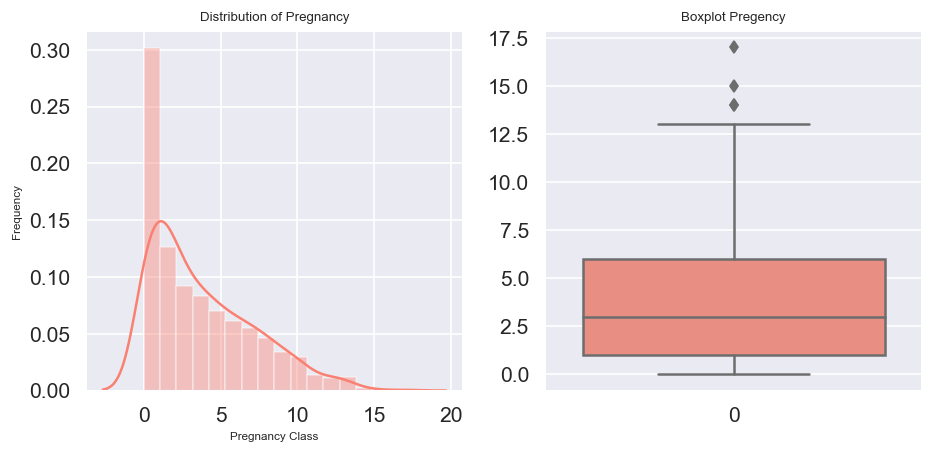

In [70]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df['Pregnancies'],ax=axes[0],color='salmon')
axes[0].set_title('Distribution of Pregnancy',fontdict={'fontsize':8})
axes[0].set_xlabel('Pregnancy Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency',fontdict={'fontsize':7})

plt.tight_layout()

plot01=sns.boxplot(data=df['Pregnancies'],ax=axes[1],orient = 'v',color='salmon')
axes[1].set_title('Boxplot Pregency',fontdict={'fontsize':8})
plt.tight_layout()

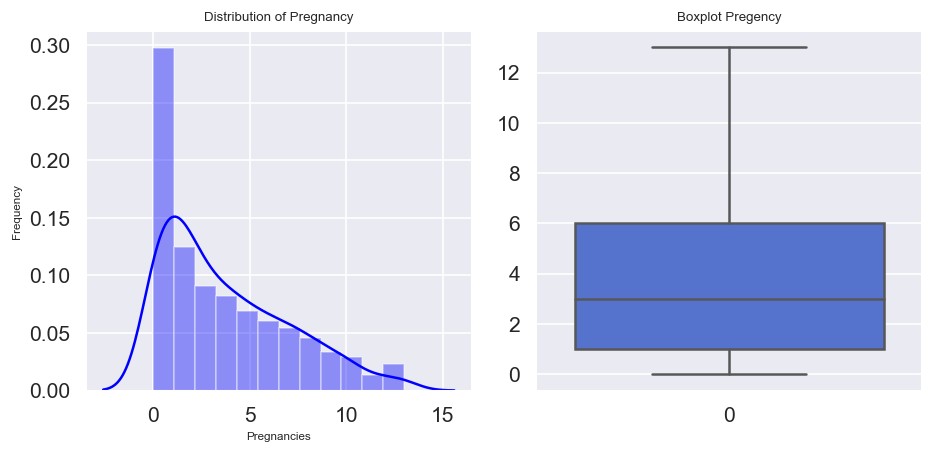

In [71]:
#Treating Outlier and then verifying it

df = std_based('Pregnancies',df)

fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df['Pregnancies'],ax=axes[0],color='blue')
axes[0].set_title('Distribution of Pregnancy',fontdict={'fontsize':8})
axes[0].set_xlabel('Pregnancies',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot(data = df['Pregnancies'],ax=axes[1],orient = 'v',color='royalblue')
axes[1].set_title('Boxplot Pregency',fontdict={'fontsize':8})
plt.tight_layout()

### Glucose

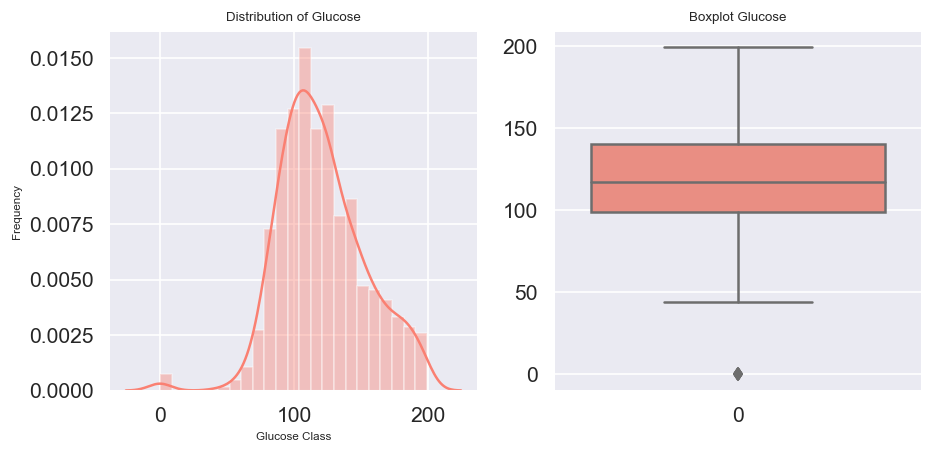

In [72]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df['Glucose'],ax=axes[0],color='salmon')
axes[0].set_title('Distribution of Glucose',fontdict={'fontsize':8})
axes[0].set_xlabel('Glucose Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency',fontdict={'fontsize':7})

plt.tight_layout()

plot01=sns.boxplot(data=df['Glucose'],ax=axes[1],orient = 'v',color='salmon')
axes[1].set_title('Boxplot Glucose',fontdict={'fontsize':8})
plt.tight_layout()

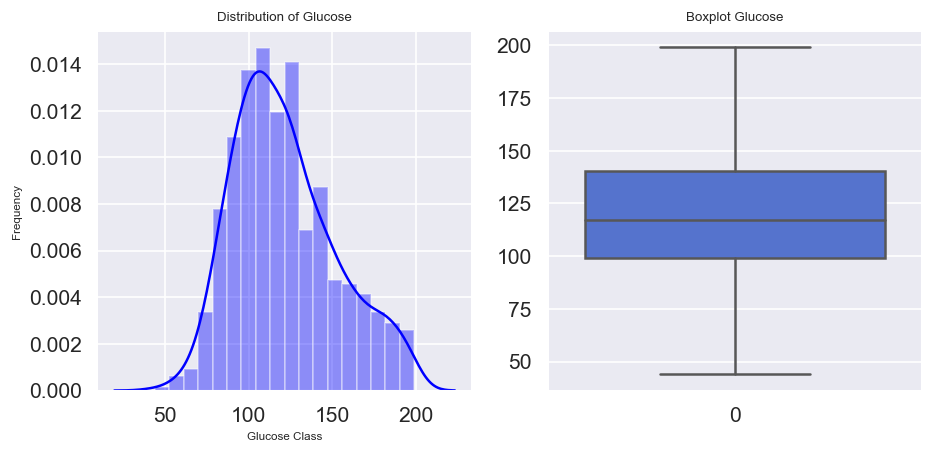

In [73]:
df = std_based('Glucose',df)

fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df['Glucose'],ax=axes[0],color='blue')
axes[0].set_title('Distribution of Glucose',fontdict={'fontsize':8})
axes[0].set_xlabel('Glucose Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency',fontdict={'fontsize':7})

plt.tight_layout()

plot01=sns.boxplot(data=df['Glucose'],ax=axes[1],orient = 'v',color='royalblue')
axes[1].set_title('Boxplot Glucose',fontdict={'fontsize':8})
plt.tight_layout()

### BloodPressure

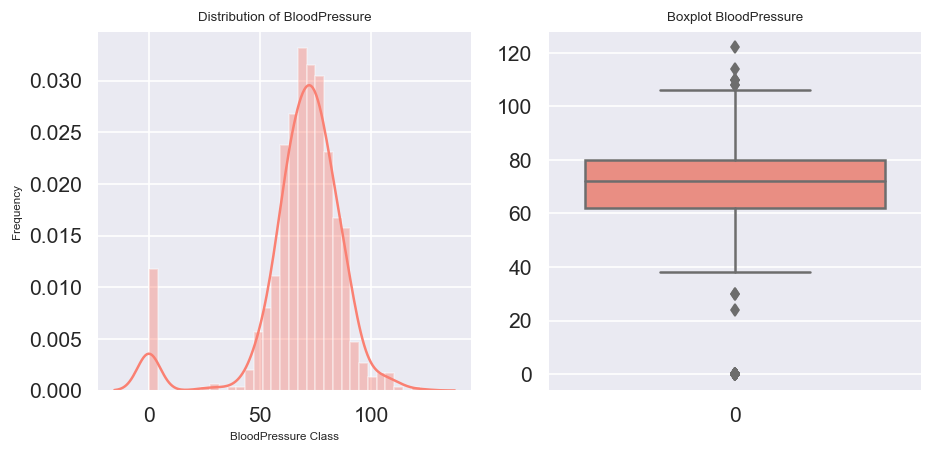

In [74]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df['BloodPressure'],ax=axes[0],color='salmon')
axes[0].set_title('Distribution of BloodPressure',fontdict={'fontsize':8})
axes[0].set_xlabel('BloodPressure Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency',fontdict={'fontsize':7})

plt.tight_layout()

plot01=sns.boxplot(data=df['BloodPressure'],ax=axes[1],orient = 'v',color='salmon')
axes[1].set_title('Boxplot BloodPressure',fontdict={'fontsize':8})
plt.tight_layout()

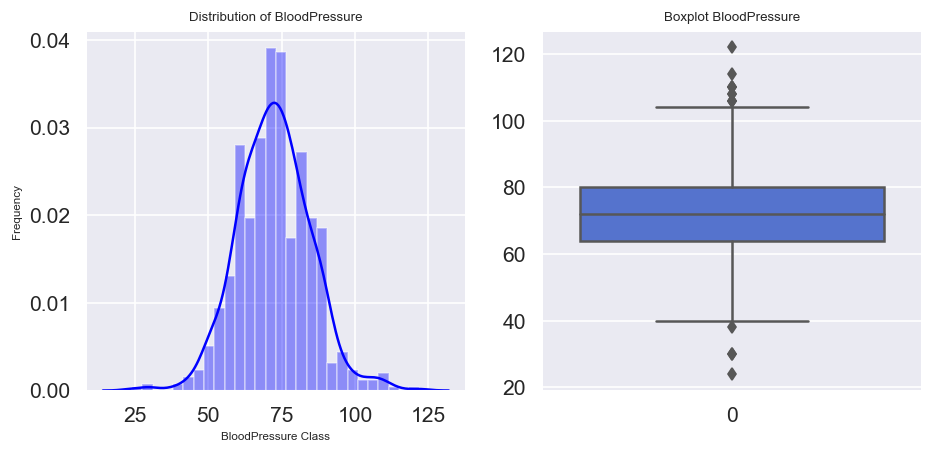

In [75]:
df = std_based('BloodPressure',df)

fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df['BloodPressure'],ax=axes[0],color='blue')
axes[0].set_title('Distribution of BloodPressure',fontdict={'fontsize':8})
axes[0].set_xlabel('BloodPressure Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency',fontdict={'fontsize':7})

plt.tight_layout()

plot01=sns.boxplot(data=df['BloodPressure'],ax=axes[1],orient = 'v',color='royalblue')
axes[1].set_title('Boxplot BloodPressure',fontdict={'fontsize':8})
plt.tight_layout()

### SkinThickness

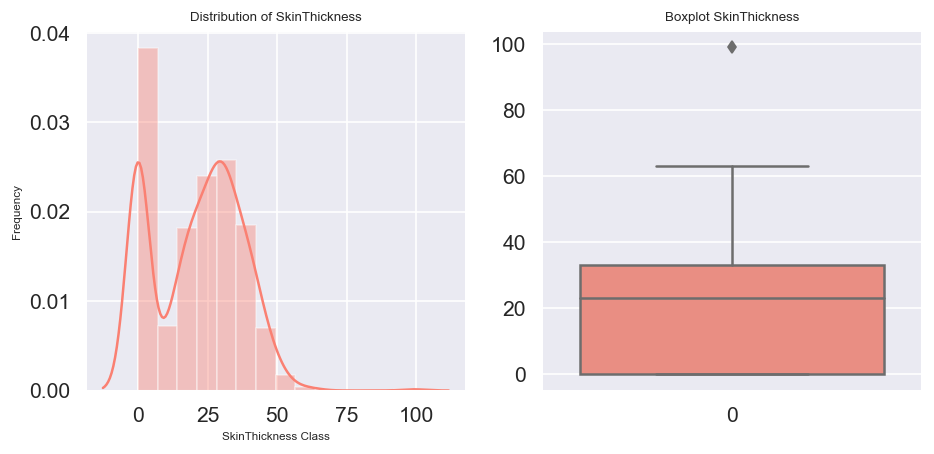

In [76]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df['SkinThickness'],ax=axes[0],color='salmon')
axes[0].set_title('Distribution of SkinThickness',fontdict={'fontsize':8})
axes[0].set_xlabel('SkinThickness Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency',fontdict={'fontsize':7})

plt.tight_layout()

plot01=sns.boxplot(data=df['SkinThickness'],ax=axes[1],orient = 'v',color='salmon')
axes[1].set_title('Boxplot SkinThickness',fontdict={'fontsize':8})
plt.tight_layout()

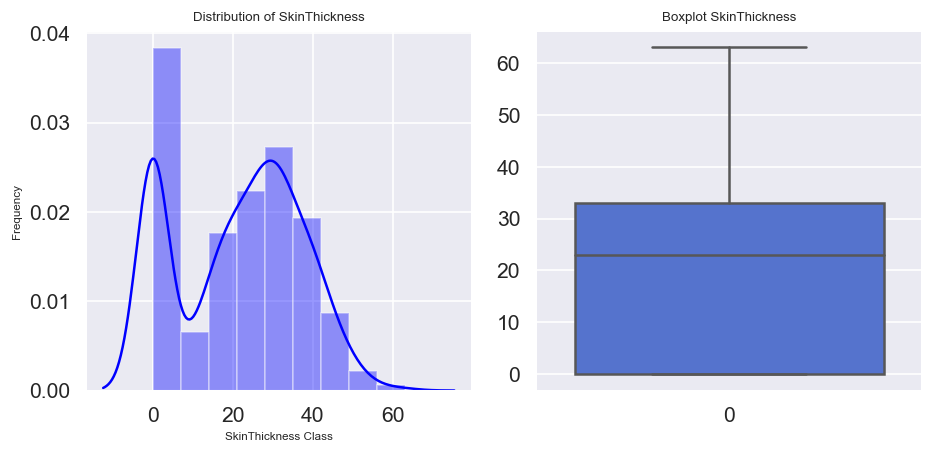

In [77]:
df = std_based('SkinThickness',df)

fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df['SkinThickness'],ax=axes[0],color='blue')
axes[0].set_title('Distribution of SkinThickness',fontdict={'fontsize':8})
axes[0].set_xlabel('SkinThickness Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency',fontdict={'fontsize':7})

plt.tight_layout()

plot01=sns.boxplot(data=df['SkinThickness'],ax=axes[1],orient = 'v',color='royalblue')
axes[1].set_title('Boxplot SkinThickness',fontdict={'fontsize':8})
plt.tight_layout()

### Insulin

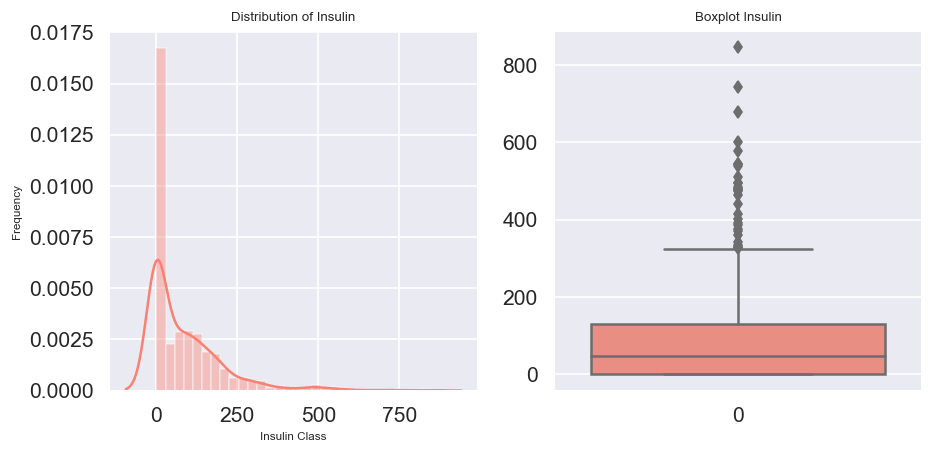

In [78]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df['Insulin'],ax=axes[0],color='salmon')
axes[0].set_title('Distribution of Insulin',fontdict={'fontsize':8})
axes[0].set_xlabel('Insulin Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency',fontdict={'fontsize':7})

plt.tight_layout()

plot01=sns.boxplot(data=df['Insulin'],ax=axes[1],orient = 'v',color='salmon')
axes[1].set_title('Boxplot Insulin',fontdict={'fontsize':8})
plt.tight_layout()

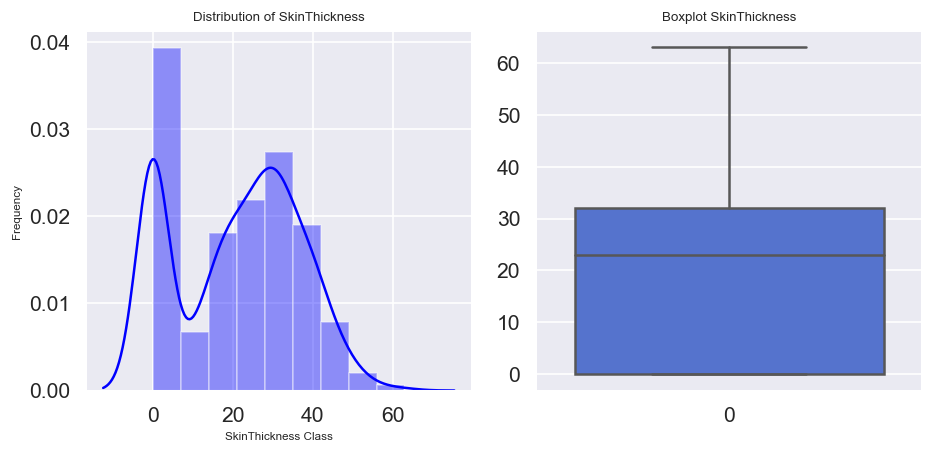

In [79]:
df = std_based('Insulin',df)

fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df['SkinThickness'],ax=axes[0],color='blue')
axes[0].set_title('Distribution of SkinThickness',fontdict={'fontsize':8})
axes[0].set_xlabel('SkinThickness Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency',fontdict={'fontsize':7})

plt.tight_layout()

plot01=sns.boxplot(data=df['SkinThickness'],ax=axes[1],orient = 'v',color='royalblue')
axes[1].set_title('Boxplot SkinThickness',fontdict={'fontsize':8})
plt.tight_layout()

### BMI

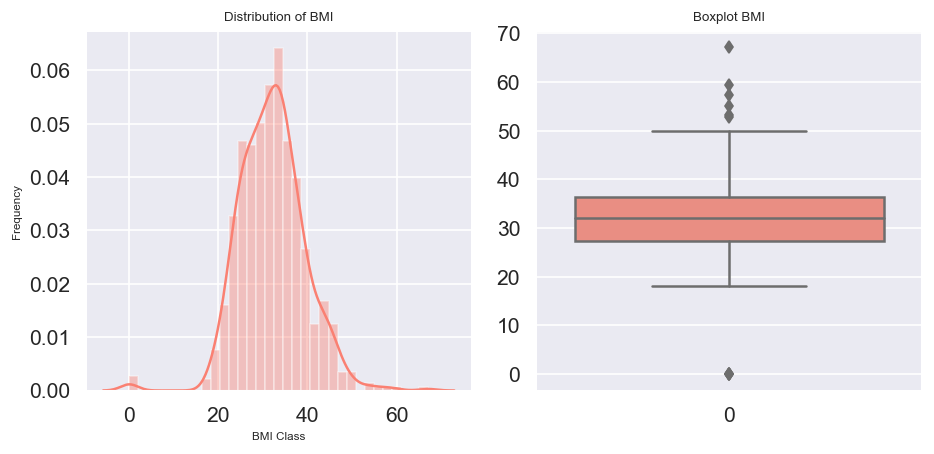

In [80]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df['BMI'],ax=axes[0],color='salmon')
axes[0].set_title('Distribution of BMI',fontdict={'fontsize':8})
axes[0].set_xlabel('BMI Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency',fontdict={'fontsize':7})

plt.tight_layout()

plot01=sns.boxplot(data=df['BMI'],ax=axes[1],orient = 'v',color='salmon')
axes[1].set_title('Boxplot BMI',fontdict={'fontsize':8})
plt.tight_layout()

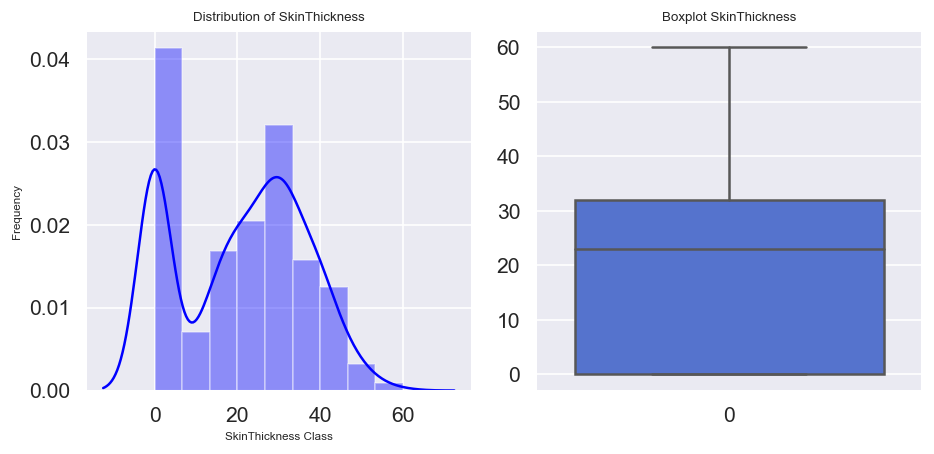

In [81]:
df = std_based('BMI',df)

fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df['SkinThickness'],ax=axes[0],color='blue')
axes[0].set_title('Distribution of SkinThickness',fontdict={'fontsize':8})
axes[0].set_xlabel('SkinThickness Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency',fontdict={'fontsize':7})

plt.tight_layout()

plot01=sns.boxplot(data=df['SkinThickness'],ax=axes[1],orient = 'v',color='royalblue')
axes[1].set_title('Boxplot SkinThickness',fontdict={'fontsize':8})
plt.tight_layout()

### DiabetesPedigreeFunction

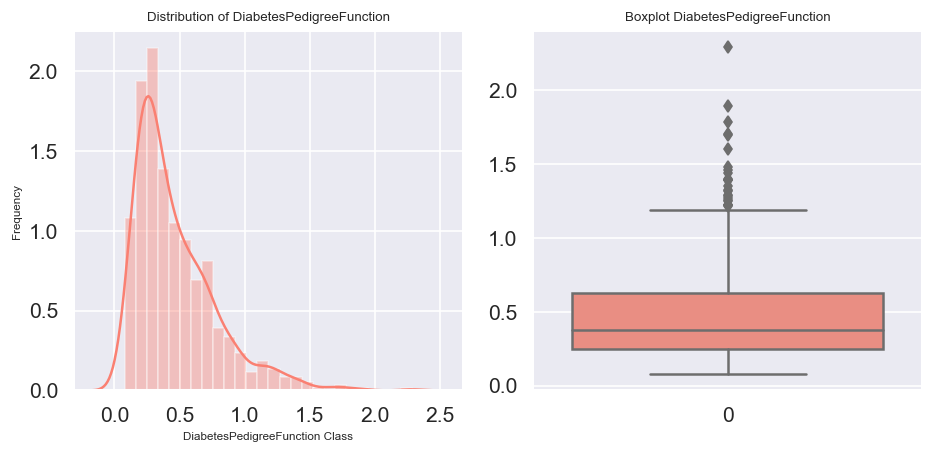

In [82]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df['DiabetesPedigreeFunction'],ax=axes[0],color='salmon')
axes[0].set_title('Distribution of DiabetesPedigreeFunction',fontdict={'fontsize':8})
axes[0].set_xlabel('DiabetesPedigreeFunction Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency',fontdict={'fontsize':7})

plt.tight_layout()

plot01=sns.boxplot(data=df['DiabetesPedigreeFunction'],ax=axes[1],orient = 'v',color='salmon')
axes[1].set_title('Boxplot DiabetesPedigreeFunction',fontdict={'fontsize':8})
plt.tight_layout()

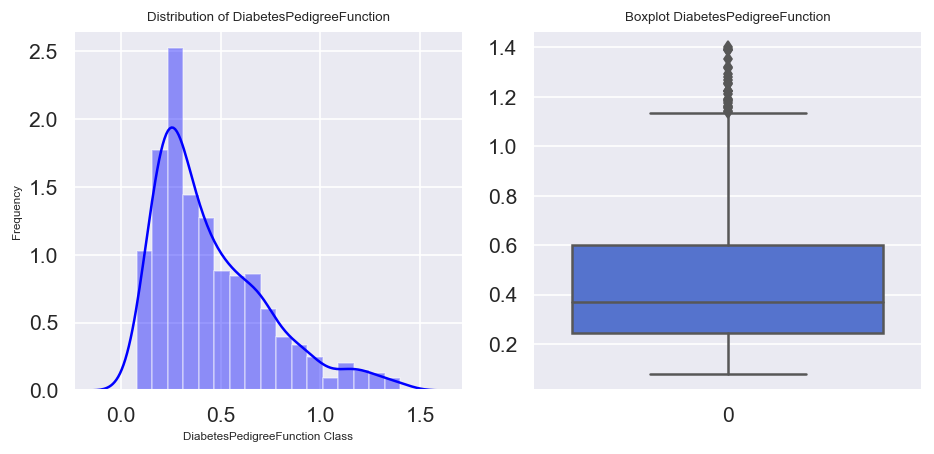

In [83]:
df = std_based('DiabetesPedigreeFunction',df)

fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df['DiabetesPedigreeFunction'],ax=axes[0],color='blue')
axes[0].set_title('Distribution of DiabetesPedigreeFunction',fontdict={'fontsize':8})
axes[0].set_xlabel('DiabetesPedigreeFunction Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency',fontdict={'fontsize':7})

plt.tight_layout()

plot01=sns.boxplot(data=df['DiabetesPedigreeFunction'],ax=axes[1],orient = 'v',color='royalblue')
axes[1].set_title('Boxplot DiabetesPedigreeFunction',fontdict={'fontsize':8})
plt.tight_layout()

### Age

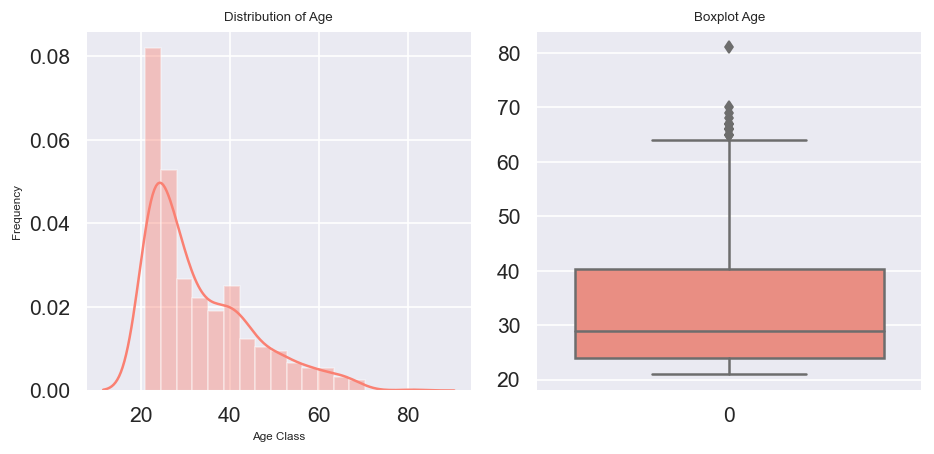

In [84]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df['Age'],ax=axes[0],color='salmon')
axes[0].set_title('Distribution of Age',fontdict={'fontsize':8})
axes[0].set_xlabel('Age Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency',fontdict={'fontsize':7})

plt.tight_layout()

plot01=sns.boxplot(data=df['Age'],ax=axes[1],orient = 'v',color='salmon')
axes[1].set_title('Boxplot Age',fontdict={'fontsize':8})
plt.tight_layout()

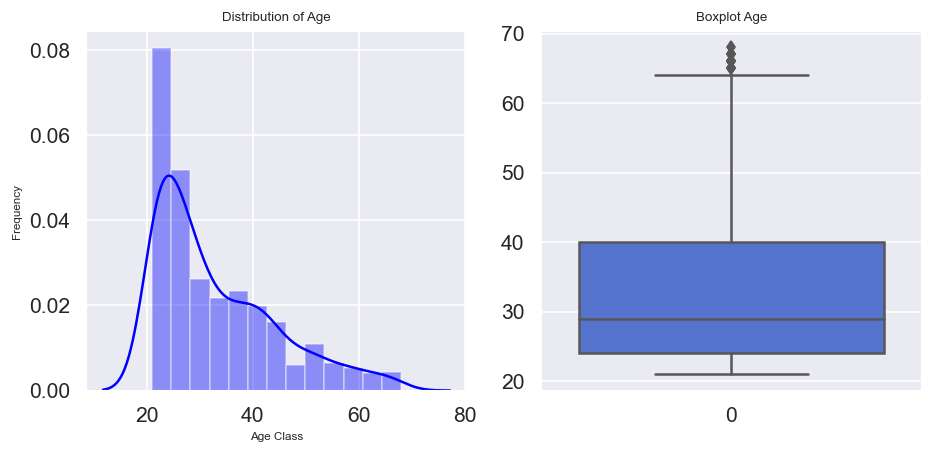

In [85]:
df = std_based('Age',df)

fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df['Age'],ax=axes[0],color='blue')
axes[0].set_title('Distribution of Age',fontdict={'fontsize':8})
axes[0].set_xlabel('Age Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency',fontdict={'fontsize':7})

plt.tight_layout()

plot01=sns.boxplot(data=df['Age'],ax=axes[1],orient = 'v',color='royalblue')
axes[1].set_title('Boxplot Age',fontdict={'fontsize':8})
plt.tight_layout()

# Exploratory Data Analysis (EDA)

## Univariate Analysis

Given the pathology of Diabetes the primal assumption is that the following factors might forcast the outcome:

Glucose level in a glucose tolerance test (Higher the glucose higher the chance of diabetes) <br>
BMI (Higher the BMI higher the chance of diabetes) <br>
Diabetes family history (Higher the family incidence higher the chance of diabetes) <br>

In [86]:
#adding Mapping Replace
df['Label'] = df['Outcome'].map(lambda r: {0: 'NonDiabetes', 1: 'Diabetes'}[r])

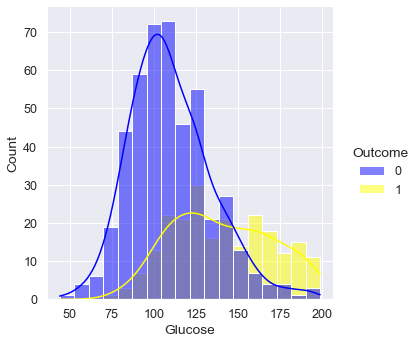

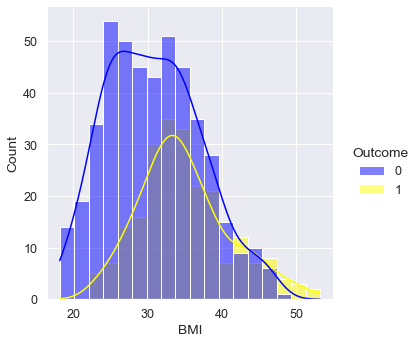

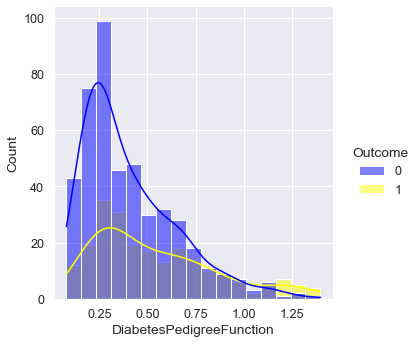

In [87]:
num_cols = ['Glucose', 'BMI', 'DiabetesPedigreeFunction']
palette = {0: 'blue', 1: 'yellow'}
for i in num_cols:
    sns.displot(data = df, kde=True, x = df[str(i)], hue='Outcome', palette = palette)
    plt.show()

Glucose level - outcome 0: normal distribution | outcome 1: bimodal distribution with a global maximum at 130 and a local max at 160 mmol/L <br>

BMI - outcome 0: normal distribution | outcome 1: binomial distribution<br>

Diabetes family history - outcome 0: normal distribution, positive skewed | outcome 1: binomial distribution, positive skewed

## Correlation Each Attribute

Text(0.5, 1.0, 'Correlation between features')

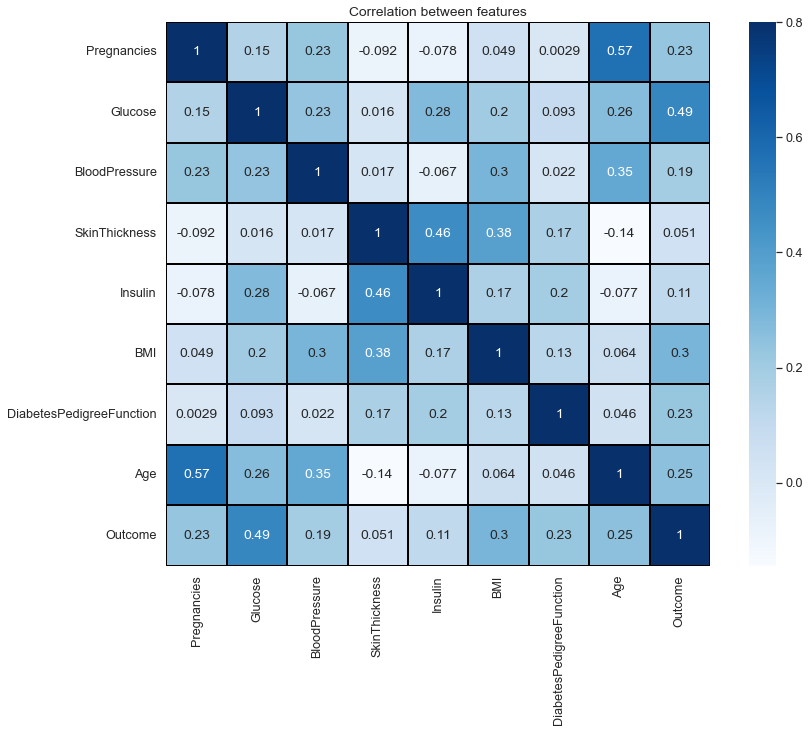

In [88]:
corr=df.corr()

sns.set(font_scale=1.15)
plt.figure(figsize=(14, 10))

sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='Blues',linecolor="black")
plt.title('Correlation between features')

In [89]:
# draw a correlation matrix to see what features are corralating to the outcome the most:
display(df.corr().sort_values('Outcome', ascending=False))
correlation = df.corr().sort_values('Outcome', ascending=False)[['Outcome']]
correlation.style.background_gradient(cmap='Blues')

Pregnancies   Glucose  BloodPressure  SkinThickness  \
Outcome                      0.232071  0.486779       0.194683       0.051373   
Glucose                      0.152584  1.000000       0.232865       0.016203   
BMI                          0.049432  0.201749       0.295671       0.383468   
Age                          0.566643  0.263139       0.352166      -0.143830   
Pregnancies                  1.000000  0.152584       0.225452      -0.091684   
DiabetesPedigreeFunction     0.002890  0.092892       0.021949       0.170783   
BloodPressure                0.225452  0.232865       1.000000       0.016898   
Insulin                     -0.077639  0.277775      -0.067134       0.461351   
SkinThickness               -0.091684  0.016203       0.016898       1.000000   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Outcome                   0.108156  0.295154                  0.225279   
Glucose                   0.277775  0.201749                  0.092892   
BMI                       0.166472  1.000000                  0.125688   
Age                      -0.077471  0.064388                  0.045870   
Pregnancies              -0.077639  0.049432                  0.002890   
DiabetesPedigreeFunction  0.195068  0.125688                  1.000000   
BloodPressure            -0.067134  0.295671                  0.021949   
Insulin                   1.000000  0.166472                  0.195068   
SkinThickness             0.461351  0.383468                  0.170783   

                               Age   Outcome  
Outcome                   0.252399  1.000000  
Glucose                   0.263139  0.486779  
BMI                       0.064388  0.295154  
Age                       1.000000  0.252399  
Pregnancies               0.566643  0.232071  
DiabetesPedigreeFunction  0.045870  0.225279  
BloodPressure             0.352166  0.194683  
Insulin                  -0.077471  0.108156  
SkinThickness            -0.143830  0.051373

Text(0.5, 1.0, 'Correlation matrix based on Outcome')

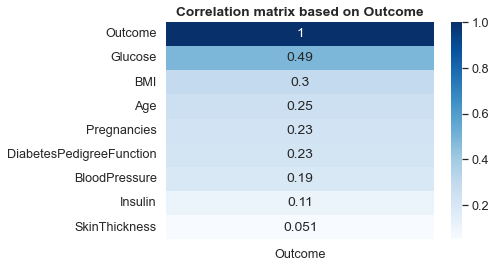

In [90]:
ax = sns.heatmap(correlation, annot=True, cmap='Blues')
ax.set_title(
        "Correlation matrix based on Outcome",
        fontdict={"fontweight": "bold"},
    )

## Proportional

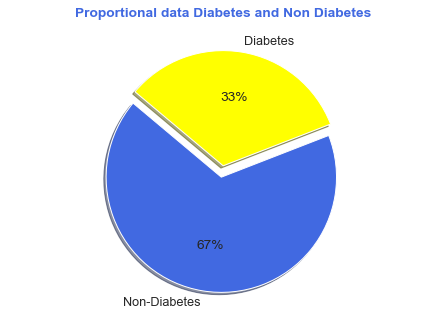

In [91]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
labels = ['Non-Diabetes','Diabetes']
diabetes_count = df.Outcome.value_counts()
ax.set_title(
        "Proportional data Diabetes and Non Diabetes",
        fontdict={"fontweight": "bold"},
    color='royalblue'
    )
explode = (0.1, 0)
colors = ['royalblue','yellow']
ax.pie(diabetes_count,  labels=labels, autopct='%.0f%%', shadow=True, startangle=140, explode=explode,colors=colors)
plt.show()

# Data Preprocessing

In [92]:
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])
df

Pregnancies   Glucose  BloodPressure  SkinThickness  Insulin       BMI  \
0              6  0.928417             72             35        0  0.217869   
1              1 -1.177208             66             29        0 -0.849223   
2              8  2.098209             64              0        0 -1.352281   
3              1 -1.043518             66             23       94 -0.620561   
5              5 -0.141107             74              0        0 -1.001665   
..           ...       ...            ...            ...      ...       ...   
763           10 -0.642446             76             48      180  0.111160   
764            2  0.059429             70             27        0  0.705683   
765            5  0.026006             72             23      112 -0.910200   
766            1  0.193119             60              0        0 -0.315677   
767            1 -0.909827             70             31        0 -0.269944   

     DiabetesPedigreeFunction  Age  Outcome        Label  
0                    0.626955   50        1     Diabetes  
1                   -0.359506   31        0  NonDiabetes  
2                    0.787791   32        1     Diabetes  
3                   -1.017146   21        0  NonDiabetes  
5                   -0.895625   30        0  NonDiabetes  
..                        ...  ...      ...          ...  
763                 -1.002849   63        0  NonDiabetes  
764                 -0.398821   27        0  NonDiabetes  
765                 -0.738364   30        0  NonDiabetes  
766                 -0.366654   47        1     Diabetes  
767                 -0.488174   23        0  NonDiabetes  

[685 rows x 10 columns]

## Menghapus Kolom Yang Tidak Diperlukan (Tidak Perlu)

In [93]:
## Decision Tree

## Encoding Data

## Spliting Himpunan Data

In [94]:
# Splitting Data

# Predictor (X) and target (y)
X = df.drop(['Outcome', 'Label'], axis=1)# Testing
y = df['Outcome']

#  Splitting train and test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pemodelan Machine Learning

### Decision Tree

In [95]:
dec_model = DecisionTreeClassifier().fit(x_train, y_train)

# Training
y_train_pred = dec_model.predict(x_train)

# Test
y_test_pred = dec_model.predict(x_test)

### Training Confusion Matrix (Decision Tree)

In [96]:
# Form confusion matrix as a DataFrame
confusion_matrix_trainig_dt = pd.DataFrame((confusion_matrix(y_train, y_train_pred)), ('No Diabetes', 'Diabetes'), ('No Diabetes', 'Diabetes'))

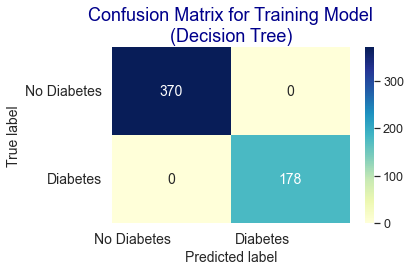

In [97]:
# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_trainig_dt, annot=True, annot_kws={'size':14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Decision Tree)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

In [98]:
# Print classification report
print('Classification Report Training Model (Decision Tree) :')
print(classification_report(y_train, y_train_pred))
print(f'Accuracy Test Score Decision Tree : {accuracy_score(y_train, y_train_pred)}')

Classification Report Training Model (Decision Tree) :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       370
           1       1.00      1.00      1.00       178

    accuracy                           1.00       548
   macro avg       1.00      1.00      1.00       548
weighted avg       1.00      1.00      1.00       548

Accuracy Test Score Decision Tree : 1.0


### Testing Confusion Matrix (Decision Tree)

In [99]:
# Form confusion matrix as a DataFrame
confusion_matrix_test_dt = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), ('No Diabetes', 'Diabetes'), ('No Diabetes', 'Diabetes'))

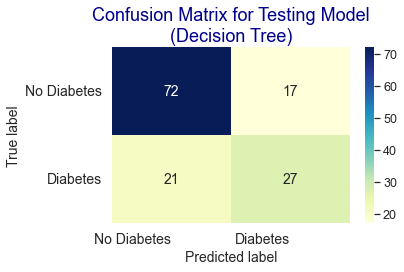

In [100]:
# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_test_dt, annot=True, annot_kws={'size':14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Decision Tree)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

In [101]:
# Print classification report
print('Classification Report Testing Model (Decision Tree) :')
print(classification_report(y_test, y_test_pred))
print(f'Accuracy Test Score Decision Tree : {accuracy_score(y_test, y_test_pred)}')

Classification Report Testing Model (Decision Tree) :
              precision    recall  f1-score   support

           0       0.77      0.81      0.79        89
           1       0.61      0.56      0.59        48

    accuracy                           0.72       137
   macro avg       0.69      0.69      0.69       137
weighted avg       0.72      0.72      0.72       137

Accuracy Test Score Decision Tree : 0.7226277372262774


### XGB

In [102]:
xgb_model = XGBClassifier().fit(x_train, y_train)

# Training
y_train_pred = xgb_model.predict(x_train)

# Test
y_test_pred= xgb_model.predict(x_test)

### Training Confusion Matrix (XGB)

In [103]:
# Form confusion matrix as a DataFrame
confusion_matrix_training_xgb = pd.DataFrame((confusion_matrix(y_train, y_train_pred)), ('No Diabetes', 'Diabetes'), ('No Diabetes', 'Diabetes'))

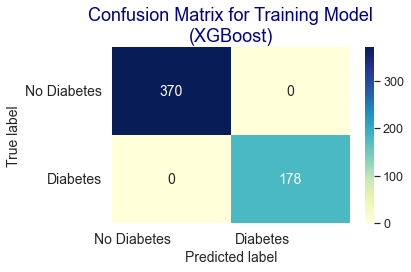

In [104]:
# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_training_xgb, annot=True, annot_kws={'size':14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(XGBoost)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

In [105]:
# Print classification report
print('Classification Report Testing Model (Decision Tree) :')
print(classification_report(y_train, y_train_pred))
print(f'Accuracy Test Score XGB : {accuracy_score(y_train, y_train_pred)}')

Classification Report Testing Model (Decision Tree) :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       370
           1       1.00      1.00      1.00       178

    accuracy                           1.00       548
   macro avg       1.00      1.00      1.00       548
weighted avg       1.00      1.00      1.00       548

Accuracy Test Score XGB : 1.0


### Testing Confusion Matrix (XGB)

In [106]:
# Form confusion matrix as a DataFrame
confusion_matrix_test_xgb = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), ('No Diabetes', 'Diabetes'), ('No Diabetes', 'Diabetes'))

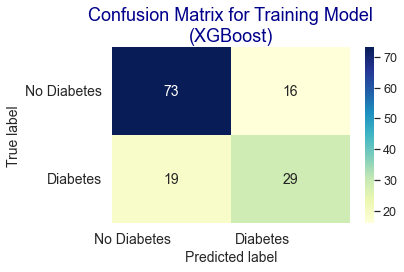

In [107]:
# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_test_xgb, annot=True, annot_kws={'size':14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(XGBoost)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

In [108]:
# Print classification report
print('Classification Report Testing Model (Decision Tree) :')
print(classification_report(y_test, y_test_pred))
print(f'Accuracy Test Score XGB : {accuracy_score(y_test, y_test_pred)}')

Classification Report Testing Model (Decision Tree) :
              precision    recall  f1-score   support

           0       0.79      0.82      0.81        89
           1       0.64      0.60      0.62        48

    accuracy                           0.74       137
   macro avg       0.72      0.71      0.72       137
weighted avg       0.74      0.74      0.74       137

Accuracy Test Score XGB : 0.7445255474452555


### LogisticRegression

In [109]:
log_model = LogisticRegression().fit(x_train, y_train)

# Training
y_train_pred = log_model.predict(x_train)

# Test
y_test_pred= log_model.predict(x_test)

### Training Confusion Matrix (LogisticRegression)

In [110]:
# Form confusion matrix as a DataFrame
confusion_matrix_training_lr= pd.DataFrame((confusion_matrix(y_train, y_train_pred)), ('No Diabetes', 'Diabetes'), ('No Diabetes', 'Diabetes'))

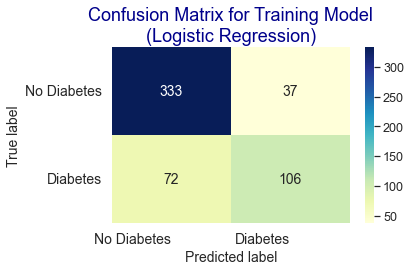

In [111]:
# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_training_lr, annot=True, annot_kws={'size':14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Logistic Regression)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

In [112]:
# Print classification report
print('Classification Report Testing Model (Decision Tree) :')
print(classification_report(y_train, y_train_pred))
print(f'Accuracy Test Score Logistic Regression :{accuracy_score(y_train, y_train_pred)}')

Classification Report Testing Model (Decision Tree) :
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       370
           1       0.74      0.60      0.66       178

    accuracy                           0.80       548
   macro avg       0.78      0.75      0.76       548
weighted avg       0.80      0.80      0.79       548

Accuracy Test Score Logistic Regression :0.801094890510949


### Test Confusion Matrix (LogisticRegression)

In [113]:
# Form confusion matrix as a DataFrame
confusion_matrix_test_lr = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), ('No Diabetes', 'Diabetes'), ('No Diabetes', 'Diabetes'))

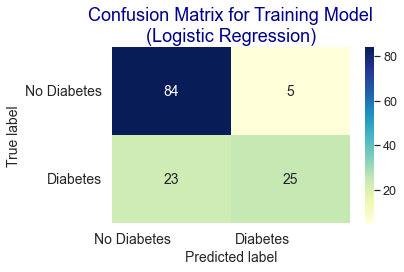

In [114]:
# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_test_lr, annot=True, annot_kws={'size':14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Logistic Regression)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

In [115]:
# Print classification report
print('Classification Report Testing Model (Decision Tree) :')
print(classification_report(y_test, y_test_pred))
print(f'Accuracy Test Score Logistic Regression : {accuracy_score(y_test, y_test_pred)}')

Classification Report Testing Model (Decision Tree) :
              precision    recall  f1-score   support

           0       0.79      0.94      0.86        89
           1       0.83      0.52      0.64        48

    accuracy                           0.80       137
   macro avg       0.81      0.73      0.75       137
weighted avg       0.80      0.80      0.78       137

Accuracy Test Score Logistic Regression : 0.7956204379562044


### ANN

### Keras & TensorFlow

In [116]:
# Import Library
# from keras.wrappers.scikit_learn import KerasClassifier
# from sklearn.model_selection import cross_val_score
# from keras.models import Sequential 
# from keras.layers import Dense